# Ejemplo de K-Means con scikit-learn

In [35]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos

Para simplificar y comprender el ejemplo se utiliza el __dataset iris__. Recodar que en el aprendizaje no supervisado no se tienen etiquetas, por lo que se realiza el supuesto de que no existen las etiquetas que identifican a cada ejemplo del conjunto de datos.

In [36]:
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

In [37]:
X = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width')

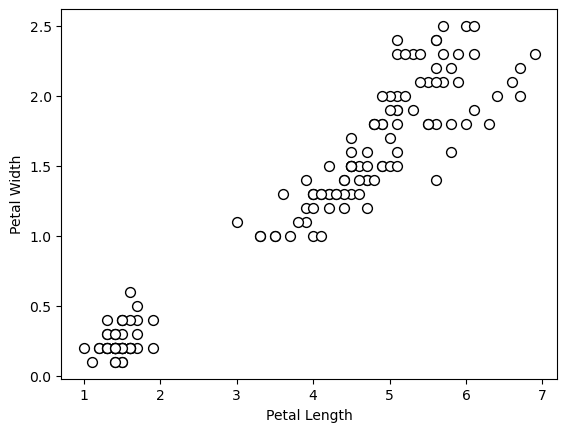

In [38]:
plt.scatter(X['Petal Length'], X['Petal Width'], c= 'white', marker='o', edgecolors='black', s=50)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

# Construcción y evaluación del modelo

In [39]:
km = KMeans(n_clusters = 3, init='random', n_init=10, max_iter = 1000, tol=1e-04, random_state=0)
km.fit(X)
y_km = km.fit_predict(X)

/Users/cmillan/anaconda3/envs/cflex/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cmillan/anaconda3/envs/cflex/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cmillan/anaconda3/envs/cflex/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cmillan/anaconda3/envs/cflex/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and wil

In [40]:
from sklearn import metrics

y_kmeans = km.predict(X)

accuracy = metrics.adjusted_rand_score(y_iris, y_kmeans)
print(accuracy)

0.7302382722834697


/Users/cmillan/anaconda3/envs/cflex/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cmillan/anaconda3/envs/cflex/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cmillan/anaconda3/envs/cflex/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Text(0, 0.5, 'Petal Width')

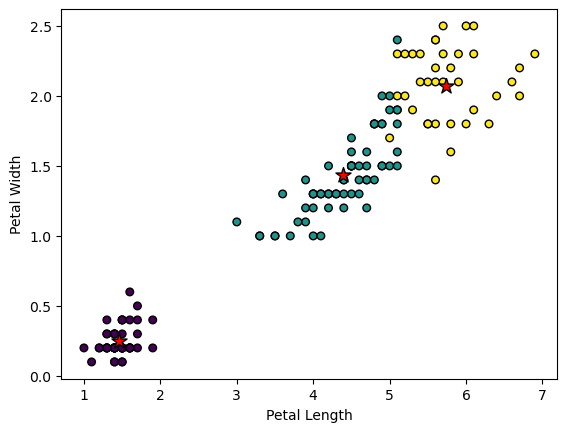

In [41]:
plt.scatter(X['Petal Length'], X['Petal Width'], c=km.labels_, s=30 , edgecolors='black')
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[: , 3], s=130, c='red', marker='*', edgecolors='black')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)